## 1. Simulation of responses

In [21]:
import random
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt

In [15]:
# Set the seed for reproducibility
np.random.seed(42)

# Number of data points
num_points = 50

# Generate data for S_0 (mean=0, std=1)
S_0 = np.random.normal(loc=0, scale=1, size=num_points)

# Generate data for S (mean=1, std=1)
S = np.random.normal(loc=1, scale=1, size=num_points)

#### Generation of responses

In [40]:
observers=["Unbiased", "Biased to yes",   "Biased to no"]
thresholds = [ 0.5 , 0, 1.1]

### This would be the code for one experiment

In [41]:
# Arrays to store TP and FP for each threshold
Ptp_values = []
Pfp_values = []
perceptual_sensitivity_values = []

# Loop through each threshold value
for c in thresholds:
    # Compute the probability of True Positives (TP) and False Positives (FP)
    Ptp = np.sum(S > c)/num_points
    Pfp = np.sum(S_0 > c)/num_points

    # Calculate perceptual sensitivity using norm.ppf
    perceptual_sensitivity = norm.ppf(Ptp) - norm.ppf(Pfp)
    
    # Append the results to the arrays
    Ptp_values.append(Ptp)
    Pfp_values.append(Pfp)
    perceptual_sensitivity_values.append(perceptual_sensitivity)

# Print the results
for i, c in enumerate(thresholds):
    print(f"For threshold (c={c}):")
    print("Probability of True Positives (TP):", Ptp_values[i])
    print("Probability of False Positives (FP):", Pfp_values[i])
    print("Perceptual Sensitivity:", perceptual_sensitivity_values[i])
    print("---")

For threshold (c=0.5):
Probability of True Positives (TP): 0.58
Probability of False Positives (FP): 0.34
Perceptual Sensitivity: 0.6143566085832555
---
For threshold (c=0):
Probability of True Positives (TP): 0.78
Probability of False Positives (FP): 0.44
Perceptual Sensitivity: 0.923162429685462
---
For threshold (c=1.1):
Probability of True Positives (TP): 0.38
Probability of False Positives (FP): 0.16
Perceptual Sensitivity: 0.6889770951103557
---


### Implementing the 100 experiments

For criterion (c=0.5):
Average Perceptual Sensitivity: 1.0809029530814476
---
For criterion (c=0):
Average Perceptual Sensitivity: 1.063949784683069
---
For criterion (c=1.1):
Average Perceptual Sensitivity: 1.0741811069717826
---


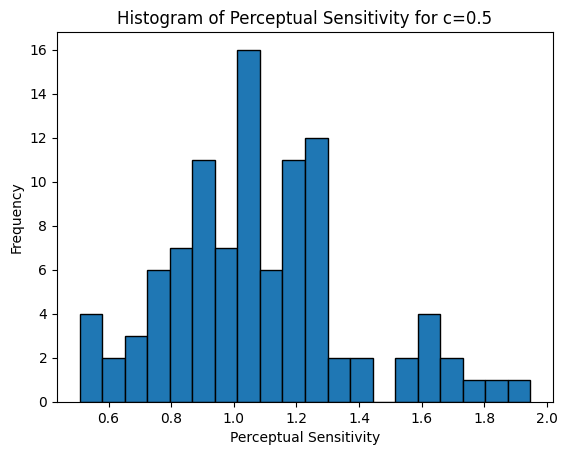

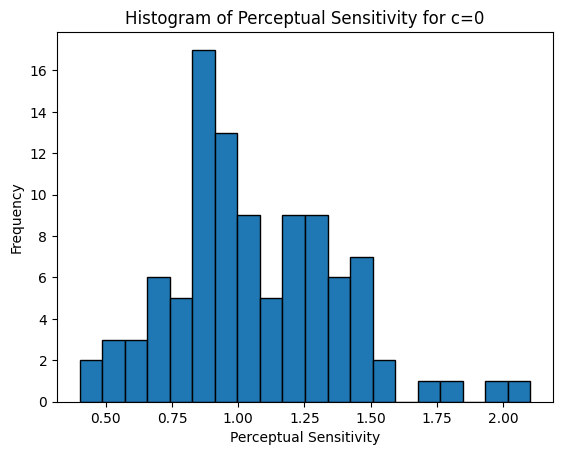

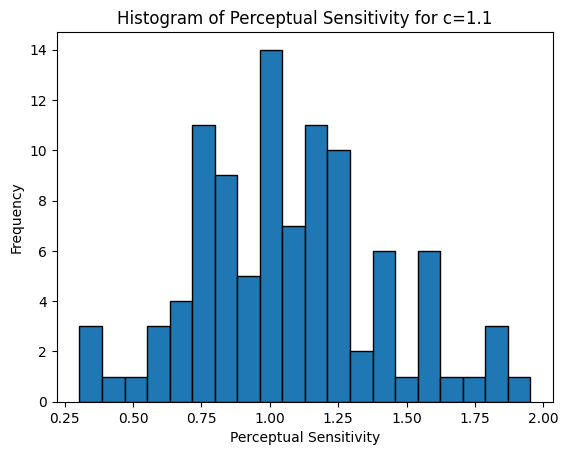

In [45]:
# Number of experiments
num_experiments = 100

# Arrays to store perceptual sensitivity for each experiment and each threshold
perceptual_sensitivity_values = np.zeros((num_experiments, len(thresholds)))

# Perform 100 experiments
for exp in range(num_experiments):
    # Generate data for S_0 (mean=0, std=1)
    S_0 = np.random.normal(loc=0, scale=1, size=num_points)

    # Generate data for S (mean=1, std=1)
    S = np.random.normal(loc=1, scale=1, size=num_points)

    # Loop through each threshold value
    for i, c in enumerate(thresholds):
        # Compute the probability of True Positives (TP) and False Positives (FP)
        Ptp = np.sum(S > c) / num_points
        Pfp = np.sum(S_0 > c) / num_points

        # Calculate perceptual sensitivity using norm.ppf
        perceptual_sensitivity = norm.ppf(Ptp) - norm.ppf(Pfp)

        # Store the result in the array
        perceptual_sensitivity_values[exp, i] = perceptual_sensitivity


for i, c in enumerate(thresholds):
    avg_perceptual_sensitivity = np.mean(perceptual_sensitivity_values[:, i])
    
    print(f"For criterion (c={c}):")
    print("Average Perceptual Sensitivity:", avg_perceptual_sensitivity)
    print("---")

# Create histograms for each threshold
for i, c in enumerate(thresholds):
    plt.hist(perceptual_sensitivity_values[:, i], bins=20, edgecolor='black')
    plt.title(f"Histogram of Perceptual Sensitivity for c={c}")
    plt.xlabel("Perceptual Sensitivity")
    plt.ylabel("Frequency")
    plt.show()

## For sigma = 0.8 

For criterion (c=0.5):
Average Perceptual Sensitivity: 1.1321505925040758
---
For criterion (c=0):
Average Perceptual Sensitivity: 1.2607298340485011
---
For criterion (c=1.1):
Average Perceptual Sensitivity: 0.9759345749750286
---


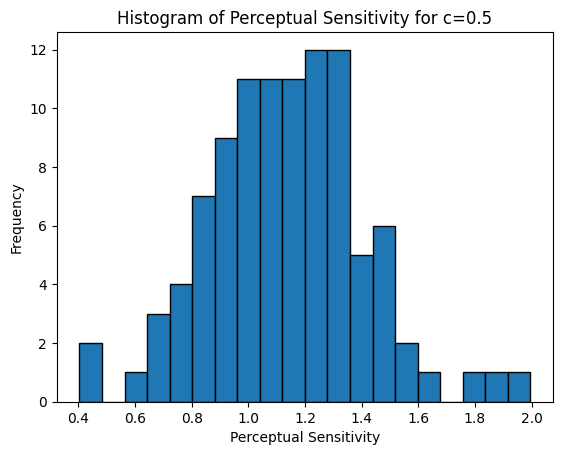

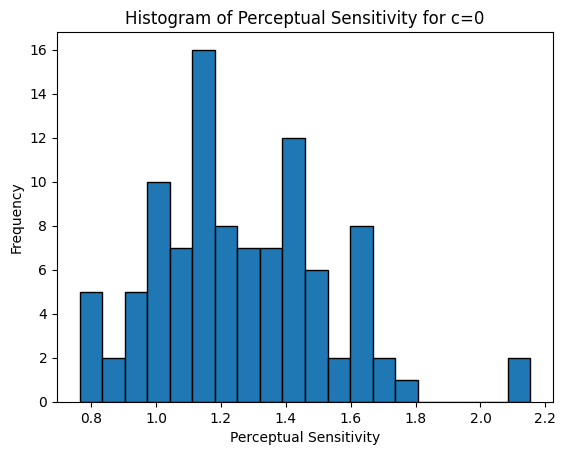

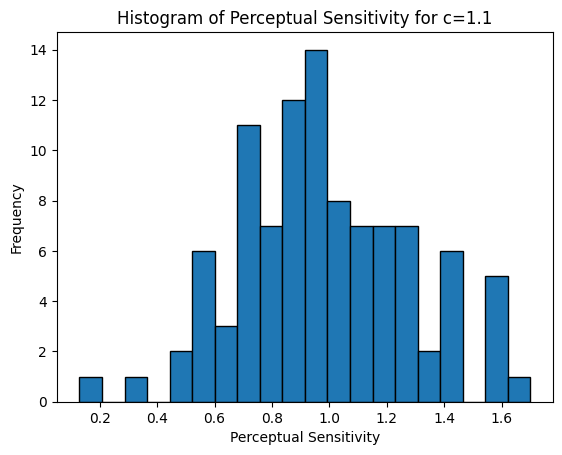

In [46]:
# Number of experiments
num_experiments = 100

# Arrays to store perceptual sensitivity for each experiment and each threshold
perceptual_sensitivity_values = np.zeros((num_experiments, len(thresholds)))

# Perform 100 experiments
for exp in range(num_experiments):
    # Generate data for S_0 (mean=0, std=1)
    S_0 = np.random.normal(loc=0, scale=1, size=num_points)

    # Generate data for S (mean=1, std=0.8)
    S = np.random.normal(loc=1, scale=0.8, size=num_points)

    # Loop through each threshold value
    for i, c in enumerate(thresholds):
        # Compute the probability of True Positives (TP) and False Positives (FP)
        Ptp = np.sum(S > c) / num_points
        Pfp = np.sum(S_0 > c) / num_points

        # Calculate perceptual sensitivity using norm.ppf
        perceptual_sensitivity = norm.ppf(Ptp) - norm.ppf(Pfp)

        # Store the result in the array
        perceptual_sensitivity_values[exp, i] = perceptual_sensitivity


for i, c in enumerate(thresholds):
    avg_perceptual_sensitivity = np.mean(perceptual_sensitivity_values[:, i])
    
    print(f"For criterion (c={c}):")
    print("Average Perceptual Sensitivity:", avg_perceptual_sensitivity)
    print("---")

# Create histograms for each threshold
for i, c in enumerate(thresholds):
    plt.hist(perceptual_sensitivity_values[:, i], bins=20, edgecolor='black')
    plt.title(f"Histogram of Perceptual Sensitivity for c={c}")
    plt.xlabel("Perceptual Sensitivity")
    plt.ylabel("Frequency")
    plt.show()